# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_mouse_study = study_results.merge(mouse_metadata,how='left',on="Mouse ID")
#combined_mouse_study.head()

In [5]:
# Display the data table for preview
combined_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Display the data table for preview

In [7]:
# Checking the number of mice.
mice_count = len(combined_mouse_study["Mouse ID"].unique())
print(mice_count)

249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_mouse_study[combined_mouse_study.duplicated(['Mouse ID','Timepoint'],keep=False)]

In [10]:
duplicate_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
#get id for Duplicate Mouse ID
ID_value = duplicate_mouse_id.iloc[0]["Mouse ID"]
print(ID_value)

g989


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = combined_mouse_study.drop(combined_mouse_study[combined_mouse_study["Mouse ID"] == ID_value].index)
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mouse_study["Mouse ID"].unique())
print(mice_count)

248


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_stat = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_stat = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_stat = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_stat = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_stat = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [15]:
# Assemble the resulting series into a single summary DataFrame.
statistical_df = pd.DataFrame({"Mean Tumor Volume":mean_stat,
                                "Median Tumor Volume":median_stat,
                                "Tumor Volume Variance":variance_stat,
                                "Tumor Volume Std. Dev.":stdev_stat,
                                "Tumor Volume Std. Err.":sem_stat})

statistical_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
statistical_agg = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
statistical_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

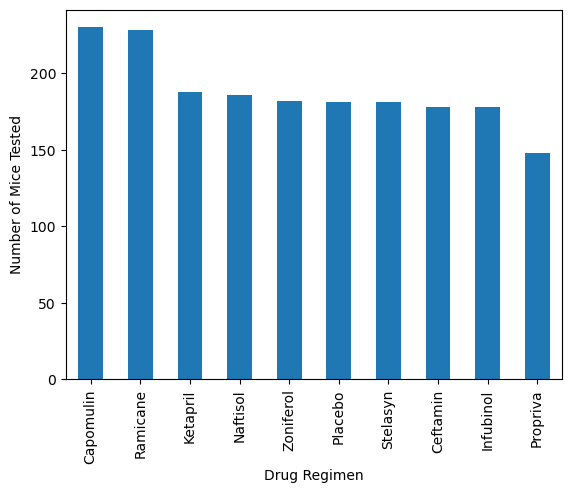

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#create groupings per drug regimen
drug_df = clean_mouse_study.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
tr = drug_df.plot(kind='bar')
tr.set_ylabel("Number of Mice Tested")


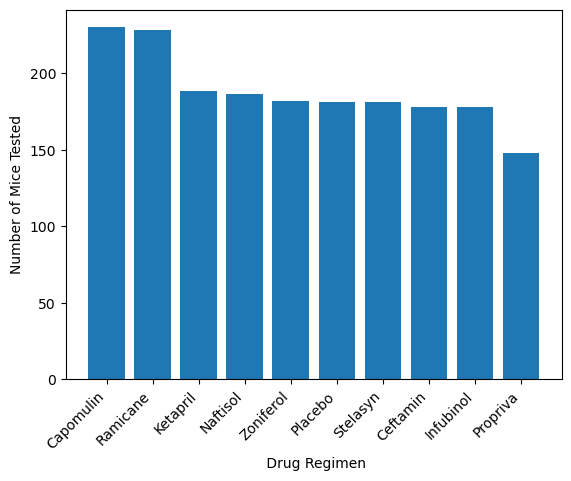

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tr = plt.bar(drug_df.index,drug_df.values)
plt.xlabel(" Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 45, ha="right")
plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#get count for each gender
gender = clean_mouse_study.groupby("Sex")["Sex"].count()


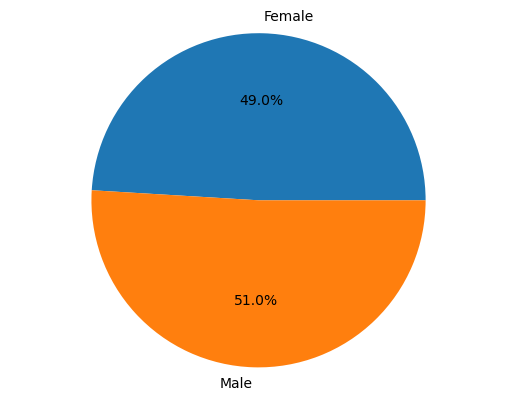

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values,labels=gender.index,autopct='%1.1f%%')
#plt.title("Distribution of Female versus Male mice")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

#filter by Drug Regime
filtered_study = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"].isin(treatments)].sort_values("Timepoint",ascending=False)
filtered_study


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1814,k403,45,22.050126,1,Ramicane,Male,21,16
1808,m546,45,30.564625,1,Ramicane,Male,18,16
1806,f345,45,60.918767,1,Infubinol,Male,23,26
1804,a203,45,67.973419,2,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
219,b487,0,45.000000,0,Ceftamin,Female,6,28
220,o287,0,45.000000,0,Ceftamin,Male,2,28
221,q483,0,45.000000,0,Ceftamin,Male,6,26
222,t573,0,45.000000,0,Ceftamin,Female,15,27


In [22]:
#(greatest) timepoint for each mouse
max_time = filtered_study.groupby("Mouse ID").max()["Timepoint"]
max_time


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [28]:
#Create empty list to fill with tumor vol data 
tumor_vol = []

#Locate Tumor Volume ofr each mouse

In [211]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quantiles = clean_mouse_study["Tumor Volume (mm3)"].quantile([0.25, 0.75])
iqr = quantiles[0.75] - quantiles[0.25]
lowerbound = quantiles[0.25] - iqr 
upperbound = quantiles[0.75] + iqr

In [236]:
    # Determine outliers using upper and lower bounds
capo_outlier = filtered_study.loc[(filtered_study["Timepoint"] < lowerbound) | (filtered_study["Timepoint"] > upperbound), :]
capo_outlier

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1352,c458,30,38.342008,2,Ramicane,Female,23,20
1365,i334,30,39.005554,1,Ramicane,Female,8,20
1354,j246,30,38.044082,1,Capomulin,Female,21,21
1356,w914,30,40.993110,0,Capomulin,Male,24,21
1357,q610,30,40.668343,1,Ramicane,Female,18,21
...,...,...,...,...,...,...,...,...
219,b487,0,45.000000,0,Ceftamin,Female,6,28
220,o287,0,45.000000,0,Ceftamin,Male,2,28
221,q483,0,45.000000,0,Ceftamin,Male,6,26
222,t573,0,45.000000,0,Ceftamin,Female,15,27


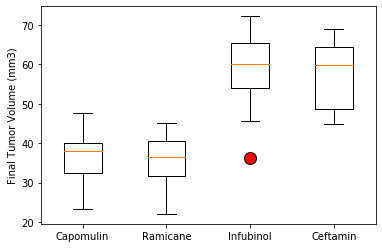

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

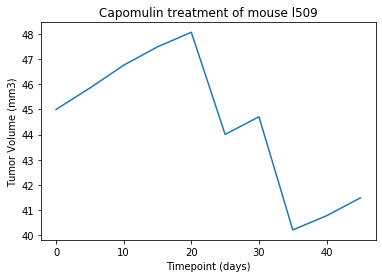

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



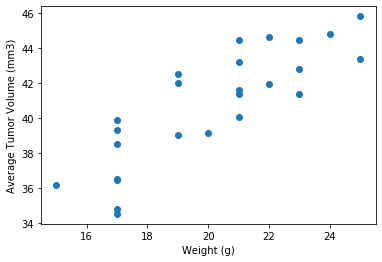

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


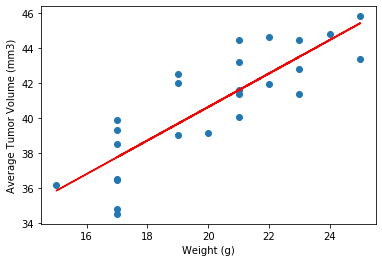

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

